In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race/ethnicity               1000 non-null   str  
 2   parental level of education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test preparation course      1000 non-null   str  
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print("Categories in Gender")
print(df["gender"].unique())
print("Categories in race/ethnicity")
print(df["race/ethnicity"].unique())
print("Categories in parental level of education")
print(df["parental level of education"].unique())
print("Categories in  lunch")
print(df["lunch"].unique())
print("Categories in  test prep score")
print(df["test preparation course"].unique())

Categories in Gender


<StringArray>
['female', 'male']
Length: 2, dtype: str

Categories in race/ethnicity
<StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
Categories in parental level of education
<StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
Categories in  lunch
<StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
Categories in  test prep score
<StringArray>
['none', 'completed']
Length: 2, dtype: str


In [24]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'str']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'str']
print("Numerical Features : ", (numeric_features))
print("Categorical Features : ", (categorical_features))

Numerical Features :  ['math score', 'reading score', 'writing score']
Categorical Features :  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [25]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [26]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
reading_full=df[df["reading score"]==100]["average"].count()
math_full=df[df["math score"]==100]["average"].count()
writing_full=df[df["writing score"]==100]["average"].count()
print("Full in Maths",math_full)
print("Full in Reading",reading_full)
print("Full in Writing",writing_full)

Full in Maths 7
Full in Reading 17
Full in Writing 14


In [29]:
reading_less_than_20=df[df["reading score"]<=20]["average"].count()
math_less_than_20=df[df["math score"]<=20]["average"].count()
writing_less_than_20=df[df["writing score"]<=20]["average"].count()
print("Less than 20 in Maths : ",math_less_than_20)
print("Less than 20 in Reading : ",reading_less_than_20)
print("Less than 20 in Writing : ",writing_less_than_20)

Less than 20 in Maths :  4
Less than 20 in Reading :  1
Less than 20 in Writing :  3


<Axes: xlabel='average', ylabel='Count'>

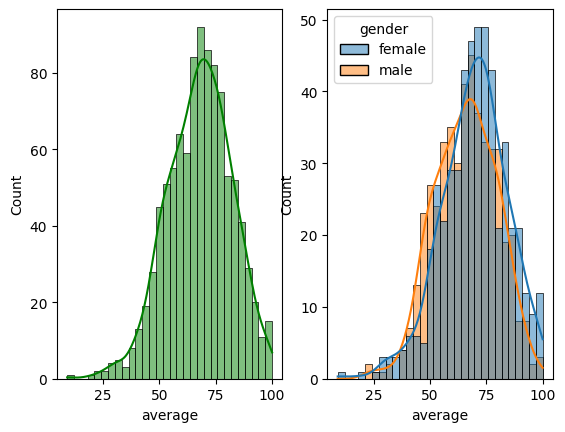

In [31]:
plt.subplot(1,2,1)
sns.histplot(data=df,x="average",bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x="average",bins=30,kde=True,hue='gender')

<Axes: xlabel='total score', ylabel='Count'>

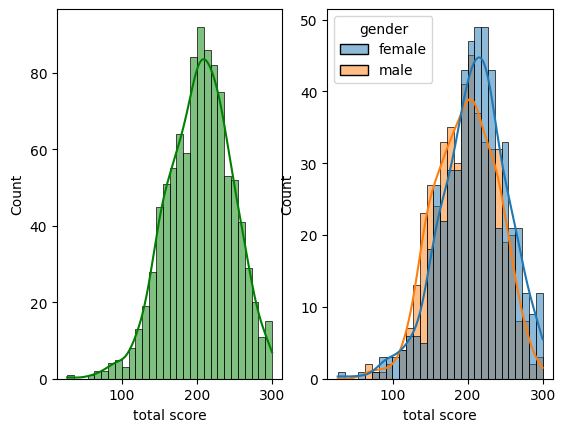

In [32]:
plt.subplot(1,2,1)
sns.histplot(data=df,x="total score",bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x="total score",bins=30,kde=True,hue='gender')

<Axes: xlabel='average', ylabel='Count'>

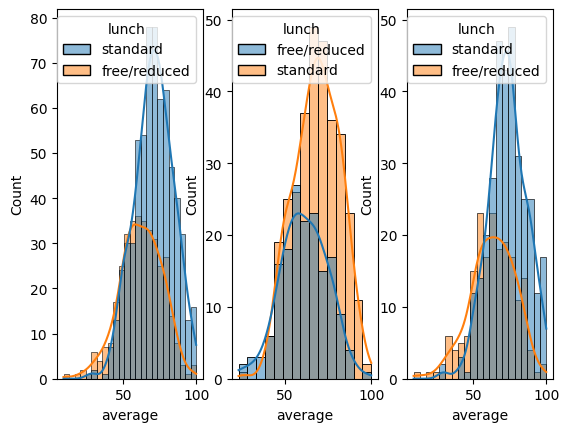

In [34]:
plt.subplot(1,3,1)
sns.histplot(data=df,x="average",kde=True,hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='male'],x="average",kde=True,hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='female'],x="average",kde=True,hue='lunch')